# 3 Basic Plotting

In [5]:
import pandas as pd

# Read in file
df = pd.read_csv('data/wetlands_seasonal_bird_diversity.csv')

# Check the first 5 rows
df.head()

,year,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall,SDW_winter,SDW_spring,SDW_fall,TJE_winter,TJE_spring,TJE_fall
0,2010,39.0,40.0,50.0,45.0,NaN,61.0,NaN,75.0,85.0,NaN,NaN,81.0
1,2011,48.0,44.0,NaN,58.0,52.0,NaN,78.0,74.0,NaN,67.0,70.0,NaN
2,2012,51.0,43.0,49.0,57.0,58.0,53.0,71.0,72.0,73.0,70.0,63.0,69.0
3,2013,42.0,46.0,38.0,60.0,58.0,62.0,69.0,70.0,70.0,69.0,74.0,64.0
4,2014,38.0,43.0,45.0,49.0,52.0,57.0,61.0,78.0,71.0,60.0,81.0,62.0


<Axes: >

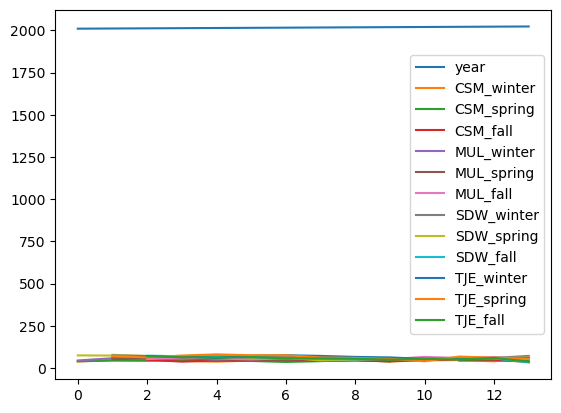

In [3]:
# Default plot(): one line plot per column with numeric data
df.plot()

# Line Plots

<Axes: xlabel='year'>

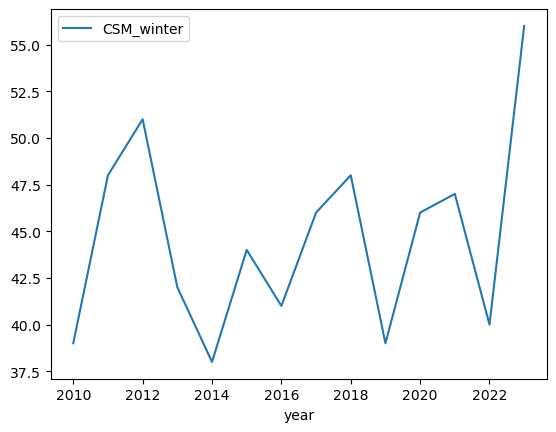

In [7]:
df.plot(x='year', y='CSM_winter')

In [ ]:
# Birds species registered during winter at CSM yearly
df.plot(x='year', y='CSM_winter')

<Axes: title={'center': 'Bird species registered during winter at Carpinteria Salt Marsh'}, xlabel='Year', ylabel='Number of bird species'>

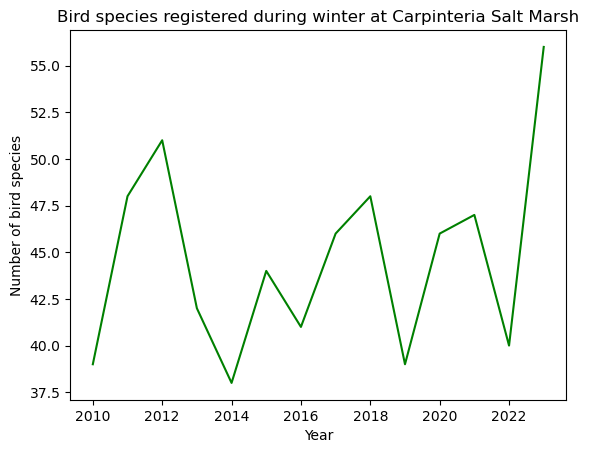

In [8]:
df.plot(x='year', 
        y='CSM_winter',
        title='Bird species registered during winter at Carpinteria Salt Marsh',
        xlabel='Year',
        ylabel='Number of bird species',
        color='green',
        legend=False
        )

## Check-in

1. Plot a graph of the spring bird surveys at Mugu Lagoon with respect to the years. Include some basic customization.

<Axes: title={'center': 'Number of bird species at Mugu Lagoon in spring'}, xlabel='Year', ylabel='Number of bird species'>

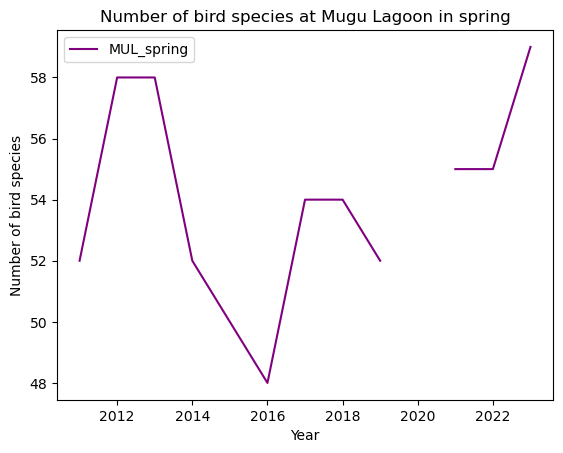

In [11]:
# Plotting spring bird surveys at Mugu Lagoon with respect to years
df.plot(x = 'year',
        y = 'MUL_spring',
        title = 'Number of bird species at Mugu Lagoon in spring',
        xlabel = 'Year',
        ylabel = 'Number of bird species',
        color = 'purple')

2. Use the isna() method for pandas.Series and row selection to select the rows in which Mugu Lagoon has NAs during the spring survey.

In [ ]:
# use `isna()`
df['MUL_spring'].isna() # pulling the values in the data frame that are NA values

0      True
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10     True
11    False
12    False
13    False
Name: MUL_spring, dtype: bool

In [ ]:
# Pulling the rows in the entire dataframe that align with the missing values in the MUL_spring column
df[df['MUL_spring'].isna()]

,year,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall,SDW_winter,SDW_spring,SDW_fall,TJE_winter,TJE_spring,TJE_fall
0,2010,39.0,40.0,50.0,45.0,NaN,61.0,NaN,75.0,85.0,NaN,NaN,81.0
10,2020,46.0,NaN,47.0,56.0,NaN,66.0,57.0,NaN,58.0,54.0,40.0,54.0


### Multiple Line Plot

In [ ]:
df.plot(x='year', 
        y=['TJE_spring', 'TJE_fall'],
        title = 'Seasonal bird surveys at Tijuana Estuary',
        xlabel='Year',
        ylabel='Number of bird species',        
        color = {'TJE_spring':'#F48FB1',
                 'TJE_fall': '#AB47BC'
                 }
        )

In [ ]:
df.plot(x='year', 
        y=['TJE_spring', 'TJE_fall'],
        title = 'Seasonal bird surveys at Tijuana Estuary',
        xlabel='Year',
        ylabel='Number of bird species',        
        color = {'TJE_spring':'#F48FB1',
                 'TJE_fall': '#AB47BC'
                 },
        subplots=True
        )

### Updating the index

In [ ]:
df = df.set_index(new_index)

In [ ]:
# Set `column_name` column in df as the new index (reassignment)
df = df.set_index('column_name')

In [ ]:
# Set `column_name` column in df as the new index (modify df in-place)
df.set_index('column_name', inplace=True)

#### Example

In [ ]:
# Update index to be the year column
df = df.set_index('year')
df.head()

In [ ]:
# Simple plot of Carpinteria Salt Marsh winter surveys
df.plot(y='CSM_winter')

In [ ]:
df = df.reset_index()
df.head()

## Check-in
Without running the code, give a step-by-step breakdown of what this code is doing:
```
df.set_index('year').loc[:,'SDW_winter':'TJE_fall'].plot()
```
**What the code is doing**: 
1. `df.set_index('year')` set the index to year
2. .loc[:, 'SDW_winter':'TJE_fall'] # selecting all of the rows, selecting SDW_winter thru TJE_fall
3. .plot() plotting our slected data frame

Using `.` is called the method chaining and is very similar to the piping operator in R!

2. Is this code modifying the data frame df? Why or why not?

This code is not modifying the data frame df


3. Run the code and examine the graph. Review the data description. Do we have all the necessary information to make sure it makes sense to directly compare the surveys at these different sites?

May be other factors that might be affecting the data. Such as the sampling areas being different sizes

<Axes: xlabel='year'>

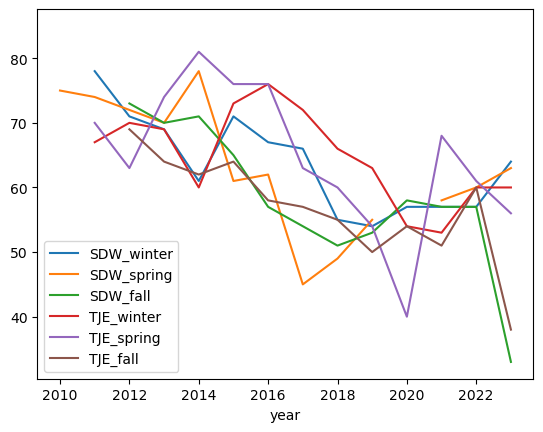

In [15]:
df.set_index('year').loc[:,'SDW_winter':'TJE_fall'].plot()

## Method Chaining

In [ ]:
df.set_index('year').loc[:,'SDW_winter':'TJE_fall'].plot()

In [ ]:
(df.set_index('year')
  .loc[:,'SDW_winter':'TJE_fall']
  .plot()
)

In [ ]:
year_index_df = df.set_index('year')
subset_df = year_index_df.loc[:,'SDW_winter':'TJE_fall']
subset_df.plot()

### Data exploration

In [17]:
# Read in data
URL = 'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv'
penguins = pd.read_csv(URL)

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [ ]:
# Check column data types and NA values
penguins.info()

In [ ]:
# Simple statistics about numeric columns
penguins.describe()

In [ ]:
# Count unique values in categorical columns and year
penguins[['species', 'island', 'sex', 'year']].nunique()

In [ ]:
# Get unique values in species column
penguins['species'].unique()

In [ ]:
# Number of values per unique value in species column
penguins['species'].value_counts()

### `kind` arguement in `plot()`

## Scatter plot

In [ ]:
penguins.plot(kind='scatter',
              x='flipper_length_mm', 
              y='body_mass_g')

In [ ]:
penguins.plot(kind='scatter',
              x='flipper_length_mm', 
              y='body_mass_g',
              title='Flipper length and body mass for Palmer penguins',
              xlabel='Flipper length (mm)',
              ylabel='Body mass (g)',
              color='#ff3b01',
              alpha=0.4  # Controls transparency
              )

### Bar plots

In [ ]:
smallest = penguins['body_mass_g'].nsmallest(10)
smallest

In [ ]:
smallest.plot(kind='bar')

In [ ]:
penguins.nsmallest(10, 'body_mass_g')

### Histograms

In [ ]:
# Using plot without subsetting data - a mess again
penguins.plot(kind='hist')

In [ ]:
# Distribution of flipper length measurements
# First select data, then plot
penguins['flipper_length_mm'].plot(kind='hist',
                                title='Penguin flipper lengths',
                                xlabel='Flipper length (mm)',
                                grid=True)

### Check-in
1. Select the bill_length_mm and bill_depth_mm columns in the penguins dataframe and then update the kind parameter to box to make boxplots of the bill length and bill depth.


<Axes: title={'center': 'Bill Length and Bill Depth Distributions'}, ylabel='Length in millimeters'>

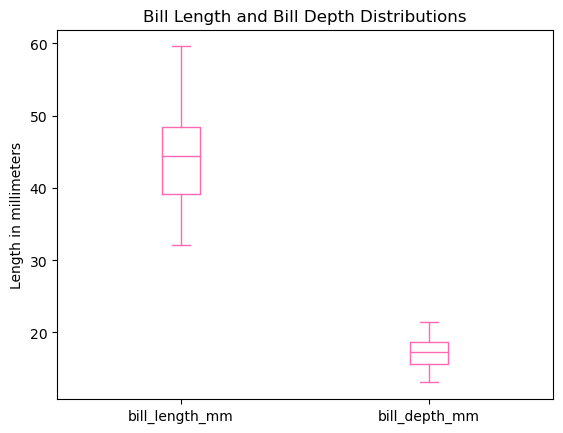

In [20]:
penguins[['bill_length_mm', 'bill_depth_mm']].plot(
    kind = 'box',
    title = 'Bill Length and Bill Depth Distributions',
    ylabel = 'Length in millimeters',
    color = "hotpink"
)


### Check-in
2. Create a simple histogram of the flipper length of female gentoo penguins.

In [ ]:
# Creating a seperate dataframe
female_gentoos = penguins[(penguins['sex'] == 'female') & (penguins['species'] == 'Gentoo')]

# Checking our new dataframe
female_gentoos

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
152,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,female,2007
154,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,female,2007
157,Gentoo,Biscoe,46.5,13.5,210.0,4550.0,female,2007
158,Gentoo,Biscoe,45.4,14.6,211.0,4800.0,female,2007
160,Gentoo,Biscoe,43.3,13.4,209.0,4400.0,female,2007
162,Gentoo,Biscoe,40.9,13.7,214.0,4650.0,female,2007
164,Gentoo,Biscoe,45.5,13.7,214.0,4650.0,female,2007
166,Gentoo,Biscoe,45.8,14.6,210.0,4200.0,female,2007
168,Gentoo,Biscoe,42.0,13.5,210.0,4150.0,female,2007
170,Gentoo,Biscoe,46.2,14.5,209.0,4800.0,female,2007


<Axes: title={'center': 'Frequency of flipper length in female Gentoo penguins'}, xlabel='Flipper Length (mm)', ylabel='Frequency'>

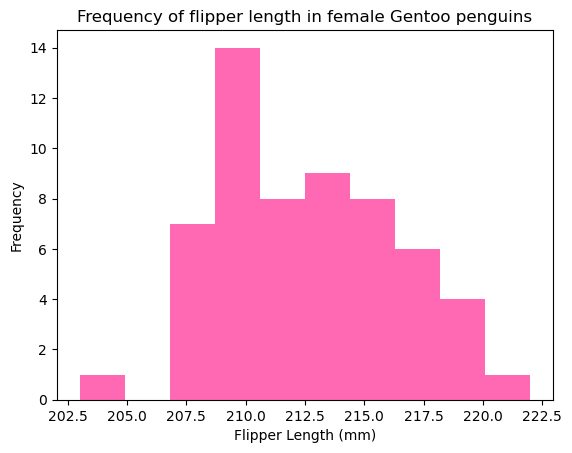

In [25]:
female_gentoos['flipper_length_mm'].plot(
    kind = 'hist',
    title = 'Frequency of flipper length in female Gentoo penguins',
    xlabel = 'Flipper Length (mm)',
    color = 'hotpink'
)

<Axes: ylabel='Frequency'>

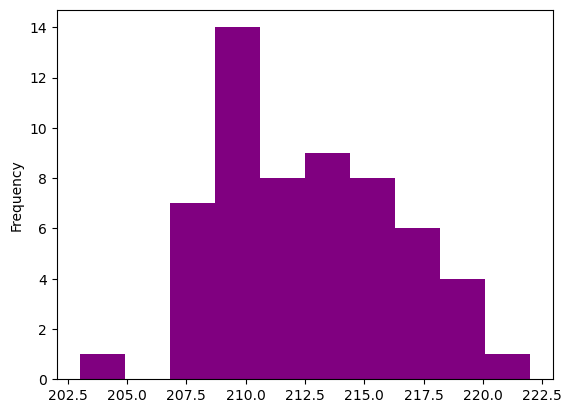

In [27]:
# Selecting rows and columns simultaneoulsy to plot
penguins.loc[(penguins['sex'] == 'female') & (penguins['species'] == 'Gentoo'), 'flipper_length_mm'].plot(
    kind = 'hist',
    color = 'purple'
)